In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility import *
from tools import *
from maps import *
from scipy.stats import linregress

In [2]:
# Load the Data's directory.
datadir = 'C:/Users/txu245/Desktop/25-11-05/04_01_02.zda'

# Load the Tool Packages.
DataLoader = DataLoader(datadir)
Tools = Tools()
Maps = Maps()

In [3]:
# Parameters setting up.
index = np.linspace(0, 499.5, 1000)
basePt = 190
skipPt = 60
startPt = 190
numPt = 60

# Data Preprocessing.
Data = DataLoader.get_data()
Data = Tools.Polynomial(startPt=basePt, numPt=skipPt, Data=Data)
Rli = DataLoader.get_rli()
Data = Tools.Rli_Division(Rli=Rli, Data=Data)
Data = Tools.T_filter(Data=Data)
Data = Tools.S_filter(sigma=1, Data=Data)
Data_ave = np.mean(Data, axis=0)

# SNR Map.
map = Maps.SNR_Map(startPt=startPt, numPt=numPt, Data=Data)

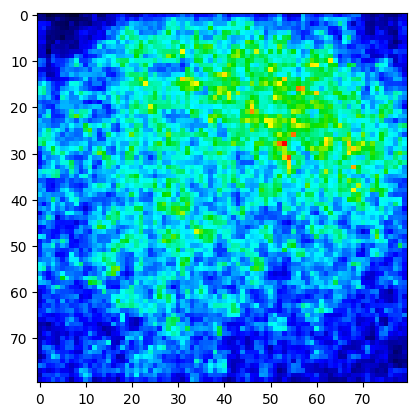

In [4]:
plt.imshow(map, vmin=0, vmax=1, cmap=Maps.colorbar())
plt.show()

In [5]:
Latency = []
Position = []

for i in range(1, 79):
    for j in range(1, 79):

        if map[i][j] >=0.7:
            if map[i][j] > max(map[i+1][j], map[i-1][j], map[i][j+1], map[i][j-1], map[i+1][j+1], map[i-1][j-1], map[i+1][j-1], map[i-1][j+1]):
                latency = []
                position = [i, j]
                Position.append(position) 

                for k in range(Data.shape[0]):

                    data = Data[k]
                    region = data[i-1:i+2, j-1:j+2, :]
                    Trace = region.mean(axis=(0, 1))

                    value = Maps.Half_Amp_Latency(Trace, startPt=startPt, numPt=numPt)
                    latency.append(value)

                Latency.append(latency)

Latency = np.array(Latency)
Position = np.array(Position)

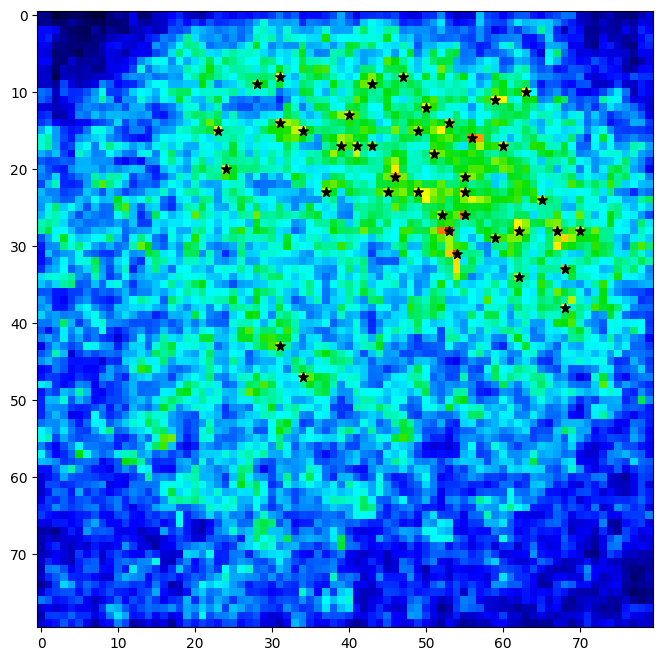

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(map, vmin=0, vmax=1, cmap=Maps.colorbar())

for i, position in enumerate(Position):
    plt.scatter(position[1], position[0], marker='*', color='black', s=50)

plt.show()

In [7]:
count = 0

for i in range(len(Position)):
    for j in range(i+1, len(Position)):

        _, _, _, PValue, _ = linregress(Latency[i], Latency[j])

        if PValue <= 0.05:
            print('Location', Position[i], 'and', Position[j], 'are correlated, and the P-Value is:', np.round(PValue, 6))
            count += 1

print('Totally', count, 'pairs.')

Location [ 8 31] and [34 62] are correlated, and the P-Value is: 0.027912
Location [ 8 47] and [29 59] are correlated, and the P-Value is: 0.039061
Location [ 9 28] and [12 50] are correlated, and the P-Value is: 0.030491
Location [ 9 28] and [17 39] are correlated, and the P-Value is: 0.041334
Location [ 9 28] and [20 24] are correlated, and the P-Value is: 0.015688
Location [ 9 28] and [43 31] are correlated, and the P-Value is: 0.013328
Location [ 9 43] and [15 34] are correlated, and the P-Value is: 0.016834
Location [ 9 43] and [20 24] are correlated, and the P-Value is: 0.025824
Location [ 9 43] and [28 70] are correlated, and the P-Value is: 0.014951
Location [10 63] and [17 60] are correlated, and the P-Value is: 0.031926
Location [11 59] and [17 43] are correlated, and the P-Value is: 0.021454
Location [11 59] and [23 45] are correlated, and the P-Value is: 0.021776
Location [11 59] and [29 59] are correlated, and the P-Value is: 0.019157
Location [11 59] and [47 34] are corre